In [69]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
df = pd.read_csv('voice.csv')
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


Below I'm just checking if there is any value that is NaN

In [71]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Checking if I have any categorical variables.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Ideed I have one column of nominal categorical variables that appears to be sex and in this case can be split binarly. I will also delete one of columns becasue seeing if the person was female we can tell if it's a man as well. 

In [73]:
dummies = pd.get_dummies(df['label'])
dummies = dummies.drop('male', axis = 1)
df = pd.concat([df, dummies], axis=1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,female
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0


In [74]:
temp = df.corr().sort_values('female', ascending=False)
temp = temp.drop(temp.index[0])
temp['female'].head(5)

meanfun     0.833921
Q25         0.511455
centroid    0.337415
meanfreq    0.337415
median      0.283919
Name: female, dtype: float64

We can see that the most correlations with the sex is located in 'meanfun', 'Q25', 'centroid', 'meanfreq' and 'median'. 
For the later part I will use random forrest as I believe that using more logical trees might provide us with better results. I will also try to devide it using k-2 neighbours clusters and the decision tree to check how they will handle it. 


# Random forrest

In [75]:
X = df[['meanfun', 'Q25', 'centroid', 'meanfreq', 'median']]
y = df['female']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [76]:
y_test_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred)
y_pred = rf.predict(X_test) 
conf_matrix = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(cm, index=['F actual', 'M actual'], columns = ['F predicted', 'M predicted']) 
conf_matrix

,F predicted,M predicted
F actual,475,19
M actual,10,447


Let's see how clusters will handle our dataset

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       494
           1       0.96      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



The precision is quite high and actually a bit better with the male. 

# k2-neighbours cluster

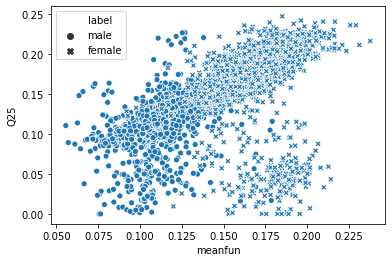

In [78]:
from sklearn.cluster import KMeans #The k-means algorithm
sns.scatterplot(x='meanfun', y='Q25', style='label', data=df)
plt.xlabel('meanfun')
plt.ylabel('Q25')
plt.show()

In [88]:
km = KMeans(n_clusters=2) 
X = df[['meanfun','Q25']]
km = km.fit(X)
df['cluster'] = km.predict(X) 
df['cluster'].value_counts()

0    1800
1    1368
Name: cluster, dtype: int64

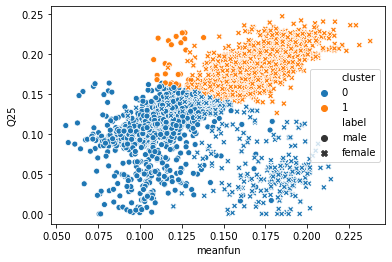

In [80]:
sns.scatterplot(x='meanfun', y='Q25', style='label', hue='cluster', data=df)
plt.xlabel('meanfun')
plt.ylabel('Q25')
plt.show()

It is easy to see with a naked eye that the clusters are quite mixed, and this way of learning do not return good results - at least none that are better than the one above.

# Decision tree

We might check as well the third option. To speed things up I copied the code with all the comments, from the example in data-driven-learning github repo. I just changed the class labels so the tree actually works. 

In [81]:
X = df[['meanfun', 'Q25', 'centroid', 'meanfreq', 'median']]
y = df['female']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [82]:
from sklearn.tree import DecisionTreeClassifier #the object class we need

dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

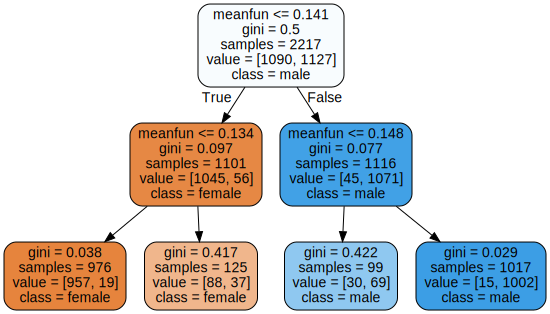

In [87]:
import graphviz #the library we need
from sklearn.tree import export_graphviz #we also need a function from sklearn to export the tree to the graphviz library

#This creates the data for the graph.
#out_file=None: do not create a file, but make a variable
#feature_names: give the variable names
#filled: make pretty colors in the graph
#rounded: make the edges round (even prettier)
#class_names: give the names of the target variable
graph_data = export_graphviz(dtree, out_file=None,
                      feature_names=X.columns.values,
                      filled=True, rounded=True,
                      class_names=['female', 'male'])

graph = graphviz.Source(graph_data) #this creates the graph based on the data we just created
graph #show the graph

The tree selects the always based upon the 'meanfun' showing that usually the value of 0.141 is the border, as every other group passes on the class. The gini is actually is quite small which shows that the we get quite cleen results. 